### Julia Mengen
Die Julia-Menge ist eine andere Betrachtungsweise der Mandelbrot-Rekursion, wobei die gleiche Folgenbildung genutzt wird. Einfach gesagt ist die Julia-Menge definiert als die Grenzwerte bei denen während der Rekursion der Funktionswert den Fluchtkreis verlässt. Dadurch bildetet eine Julia Menge ebenfalls den Rand der Gefangenenmenge, welche alle Startwerte enthält bei denen die Funktionswerte bei mehr als 1000 Iterationen den Fluchtkreis nicht verlassen. Der Algorithmus bildet für jeden Punkt des Fluchtkreises die Folge mit dem festgelegten c. Der Startwert wird entsprechend dem Zeitpunkt (Anzahl der Iterationen), bei dem der Fluchtkreis verlassen wurde, gefärbt oder beim Erreichen der 1000 Iterationen in schwarz gefärbt. Nur durch Betrachtung des c kann vorhergesagt werden, ob die Julia Menge zusammenhängend ist. Wenn der Wert im Apfelmännchen liegt, ist die Menge zusammenhängend, wenn der Wert nicht im Apfelmännchen liegt nicht. 

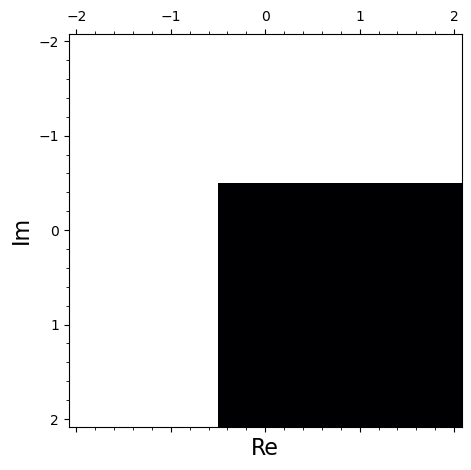

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def julia_set(width, height, c, max_iter):
    
    image = np.zeros((height, width))
    
    # Create points for a 2x2 square in which the Fluchtkreis is set
    x_range = np.linspace(-2, 2, width)
    y_range = np.linspace(-2, 2, height)

    # For every point in the Fluchtkreis
    for x in range(width):
        for y in range(height):
            zx = x_range[x] * 0.5
            zy = y_range[y] * 0.5
            if zx**2 + zy**2 <= 4 : #Continiue as long as the point is part of the Fluchtkreis
                z = complex(zx, zy)
                iteration = 0
                while abs(z) < 4 and iteration < max_iter: # Continiue while the new value is still in the Fluchtkreis and iteration is lower than max_iter
                    z = z*z + c
                    iteration += 1
                color_value = iteration / max_iter # Connect the color_value 
                image[y, x] = color_value #mark the point
    return image

def plot_julia_set(image):
    plt.imshow(image, cmap='inferno', extent=[-2, 2, -2, 2])
    plt.xlabel('Re')
    plt.ylabel('Im')
    return plt





width, height = 300, 300  # How many points we want to look at in the circle 
c = -0.7 + 0.27015j  # start value 
max_iter = 1000  # Maximum iterations for each point
image = julia_set(width, height,c, max_iter)
plot_julia_set(image)



<module 'matplotlib.pyplot' from '/private/var/tmp/sage-10.2-current/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/matplotlib/pyplot.py'>

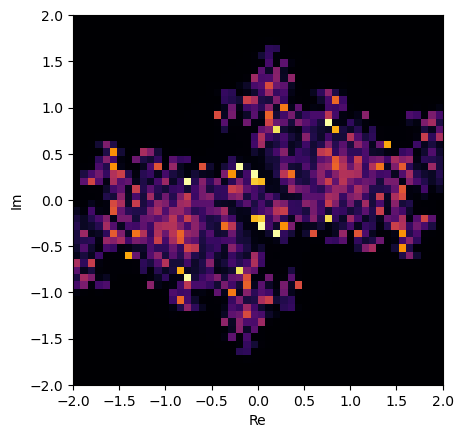

In [52]:
width, height = 50, 50  # How many points we want to look at in the circle 
c = -0.7 + 0.27015j  # start value 
max_iter = 1000  # Maximum iterations for each point
image = julia_set(width, height,c, max_iter)
plot_julia_set(image)

Anhand von dieser Grafik lässt sich eindeutig erkennen, dass jeder Pixel und damit auch jeder Startwert durch die Mandelbrot-Rekursion mit gleichen c durchgeführt wird und dadurch eingefärbt wird.

Wenn der Parameter c nun in der gleichen Funktion geändert wird, kann nicht vorhergesagt werden wie sich die Grafik und damit die Julia Menge ändern wird. 

In [59]:
import matplotlib.animation as animation
width, height = 50, 50  # How many points we want to look at in the circle 
max_iter = 100  # Maximum iterations for each point
frames = 200
interval = 50
c_values = [complex(0.7885 * np.cos(t / 20), 0.7885 * np.sin(t / 20)) for t in range(frames)]
plots = list(plot_julia_set(julia_set(width, height,c, max_iter)) for c in c_values)
def update(frame):
    """Update the plot for each frame"""
    ax.clear()
    ax.imshow(plot_list[frame], cmap='inferno', extent=[-2, 2, -2, 2])
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    return ax

ani = animation.FuncAnimation(fig, update, frames=len(plots), blit=False, repeat=True)
ani.show()

AttributeError: 'FuncAnimation' object has no attribute 'show'

### Übungsaufgaben 

1. Zeichnen Sie die Julia Menge in die gegebene Grafik ein.
2. Geben Sie den festen Wert und den Variablenwert des gegebenen SageMath Code Snippets zu der Julia Menge an.
3. Wenn der Grenzwert x = 0.5 + 0.5i Teil der Julia Menge ist und x2 = 0.51 + 0.5i Teil der Gefangenenmenge ist.
   Wird die Rekursion für z = 0.49 + 0.5i bei 1000 Iterationen den Fluchtkreis verlassen?


       